In [44]:
import pyBigWig
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
f = pyBigWig.open("../40_bigwig/Kapa-100ng-1-aa.bw")

In [39]:
f.values("chr1", 0, 10)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [41]:
chrom_list = list(f.chroms().items())

total_size = sum(v[1] for v in chrom_list)
print("total size:", total_size)

BIN_SIZE = 100000
N = total_size // BIN_SIZE

zero_coverage_bases = np.zeros(N)
print("Number of bins:", N)
i = 0

for chrom, csize in chrom_list[:3]:
    print(chrom)
    for start in range(0, csize, BIN_SIZE):
        end = min(csize, start + BIN_SIZE)
        values = f.values(chrom, start, end)
        zc = sum(v == 0 for v in values)
        zero_coverage_bases[i] = zc
        i += 1


total size: 3099922541
Number of bins: 30999
chr1
chr2
chr3


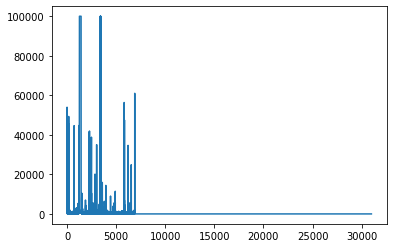

In [45]:
plt.plot(zero_coverage_bases)